<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_11_07_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04. 분류

>**01. 분류의 개요**

지도학습은 레이블 즉, 명시적 정답이 잇는 데이터가 주어진 상태에서 학습하는 머신러닝 방식. 대표적 유형이 분류. 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지하고, 새롭게 관측된 데이터에 대한 레이블을 판별. 분류를 구현하는 다양한 머신러닝 알고리즘은
<br/>나이브 베이즈(베이즈 통계와 생성 모델 기반), 로지스틱 회귀, 결정 트리(데이터 균일도에 따른 규칙 기반), 서포트 벡터 머신(개별 클래스 간 최대 분류 마진을 찾아줌), 최소 근접(근접 거리 기준), 신경망(심층 연결 기반), **앙상블(서로 다른/같은 머신러닝 알고리즘 결합)** 등이 있다.

<br/>앙상블은 일반적으로는 배깅, 부스팅으로 나뉜다. 배깅 : ex. 랜덤 포레스트, 부스팅 : ex. 그래디언트 부스팅, XgBoost, LighGBM. 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리. 결정 트리는 사전 가공의 영향이 매우 적지만 복잡한 규칙 구조를 가져야 하며 이로 인한 과적합 발생할 수 있음. 하지만 이 점은 앙상블에서는 오히려 장점.


>**02. 결정 트리**

머신러닝 알고리즘 중 직관적 이해가 쉬움. 데이터의 규칙을 학습으로 찾아내 트리 기반의 분류 규칙을 만든느 것. if/else로 규칙을 쉽게 표현 가능. 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 효율적인 분류일지가 성능을 크게 좌우.
<br/>규칙 노드 : 규칙 조건. 리프 노드 : 결정된 클래스 값, 새로운 규칙마다 서브 트리 생성. 많은 규칙이 있다=복잡->과적합. 즉, 트리의 깊이가 깊어지면 결정트리의 예측 성능 저하될 가능성 높다. 적은 결정 노트로 높은 예측 정확도 -> 데이터 분류 시 최대한 많은 데이터 세트가 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함. 균일한 데이터 세트를 구성하도록 분할하기. 

<br/>균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다. 결정 노드는 정보 균일도가 높은 데이터셋을 먼저 선택하도로 규칙 조건을 만든다. 다시 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 내려가며 반복하는 형식. 이렇게 정보의 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음.

* 정보 이득 : 엔트로피(혼잡도) 개념 기반. 정보 이득 지수는 1-엔트로피 지수. 정보 이득이 높은 속성을 기준으로 분할
* 지니 계수 : 원래 경제학의 불평등 지수. 0이 가장 평등. 1이 가장 불평등. 지니 계수 낮을수록 데이터 균일도 높아 낮은 속성 기준으로 분할.

정보 이득이 높거나 지니계수 낮은 조건 찾아 자식 트리 노드에 걸쳐 반복적 분할 후, 데이터가 모두 특정 분류에 속하게 되면 분할 멈추고 분류 결정.

  **1. 결정 트리 모델의 특징**

결정 트리 장점 : 쉽고 직관적. 단점 : 과적합으로 정확도 떨어짐. 복잡한 학습 모델은 결국 실제 상황에 유연한 대처 불가능해 예측 성능 감소. 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이 됨.

 **2. 결정 트리 파라미터**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스 제공.
<br/>min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어에 사용, 디폴트는 2, 작게 설정할수록 분할되는 노드 많아져 과적합 가능성 증가
<br/>min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적한 제어 용도지만 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요.
<br/>max_features : 최적 분할을 위해 고려할 최대 피처 개수
<br/>max_depth : 트리의 최대 깊이.
<br/>max_leaf_nodes : 말단 노드의 최대 개수

  **3. 결정 트리 모델의 시각화**

결정 트리 알고리즘 시각화 by Graphviz 패키지. exort_graphviz() API 제공. 

In [1]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file"tree.dot", class_names=iris_data.target_names, \
                feature_naems=iris_data.feature_names, impurity=True, filled=True)

SyntaxError: ignored

In [4]:
import graphviz
#위에서 생성된 tree.dot 파일 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

FileNotFoundError: ignored

시각화 가능. 살펴보자. 리프 노드 :  더이상 자식 노드가 없다. 최종 클래스 값이 결정되는 노드. 자식 노드가 있는 노드는 브랜치 노드. 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 색이 짙어질수록 지니 계수 낮고 해당 레이블에 속하는 샘플 데이터 많다. 결정 트리는 어떤 속성을 규칙 조건으로 선택하는지가 중요한 요건. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 feature_importances_ 속성으로 제공한다. ndarray 형태로 값을 반환.

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_mportances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance 를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

AttributeError: ignored

petal_length가 가장 피처 중요도가 높다.

  **3. 결정 트리 과적합**

make_calssification() 사용해 임의의 데이터 세트 만들어 분류해보자. 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 셋 만들고 시각화 할 거임.

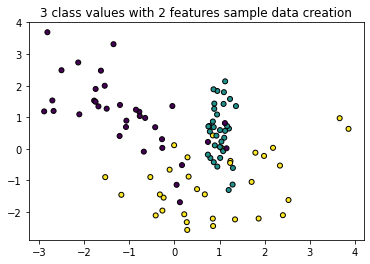

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화 위해 피처 2개, 클래스 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

이제 결정 트리 학습하자. 첫 학습은 별 제약 없음. visualize_boundary 함수를 이용해 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 이해하게 해줌.

In [7]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

In [8]:
#min_samples_leaf=6으로 트리 생성 조건 제약
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

이상치에 크게 반응하지 않으며 일반화된 분류 규칙에 따라 분류됨. 제약한 모델이 성능이 더 뛰어날 가능성이 높다.

>**03. 앙상블 학습**

**1. 앙상블 학습 개요**

앙상블 학습은 여러개의 분류기를 생성하고 그 예측을 결합해서 보다 정확한 최종 예측을 도출하는 기법. 대부분의 정형 데이터 분류 시 앙상블이 성능이 좋다. 앙상블 학습의 유형은 **보팅, 배깅, 부스팅, 스태킹 등**. **보팅과 배깅**은 투표를 통해 최종 예측 결과를 결정. **보팅**은 일반적으로 서로 다른 알고리즘을 가진 분류기 결합, **배깅**은 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 다르게 가져감. 배깅의 대표가 랜덤 포레스트 알고리즘.

배깅 : 단일 머신러닝 알고리즘으로 여러 분류기가 학습으로 개별 예측. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 classifier에게 데이터를 샘플링해서 추출하는 방식을 **부트스트래핑** 분할 방식이라 한다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해 학습을 통해 개별 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식. 

부스팅 : 여러개의 분류기가 순차적으로 학습. 다음 분류기에게는 가중치를 부여하며 진행.

스태킹 : 여러가지 다른 모델 예측 결과값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과 예측.


**2. 보팅 유형 - 하드 보팅과 소프트 보팅**


하드보팅 : 다수결 / 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 평균해 확률이 가장 높은 레이블 값을 최종 보팅 결과로 선정. 일반적으로 소프트.

**3. 보팅 분류기**

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스 제공. 보팅 방식의 앙상블 이용해 위스콘신 유방암 데이터 세트 예측 분석해보자. 사이킷런은 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트 생성. 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어 보자.

In [10]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


votingclassifier 클래스는 주요 생성 인자로 estimators(리스트 값, 보팅에 사용된 여러 classifier 객체들을 튜플 형식으로 입력)와 voting(기본은 hard) 값을 입력 받는다.

In [12]:
#개별 모델은 로지스틱 회귀와 KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습 예측 평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습 예측 평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기 정확도가 조금 높은데 여러개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다. 그러나 보팅, 배깅, 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 머신러닝 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다. 실제 환경의 문제. 높은 유연성을 가지는 것이 중요. 편향-분산 트레이드오프 과제. 

>**04. 랜덤 포레스트**

**1. 랜덤 포레스트의 개요 및 실습**

배깅 : 같은 알고리즘으로 여러개의 분류기를 만들어 보팅으로 최종 결정. 랜덤 포레스트가 대표.
<br/>랜덤 포레스트 : 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습 수행, 최종적으로 모든 분류기가 보팅 통해 예측 결정. 개별적 분류기의 기반 알고리즘은 결정트리지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링 된 것. = **부트스트래핑 분할 방식**. 통계학의 여러개의 작은 데이터 셋을 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식. 랜덤 포레스트의 섭셋 데이터는 이런 부트스트래핑으로 데이터가 임의로 만들어진다.

사이킷런은 RandomForestClassifier 클래스로 랜덤 포레스트 기반의 분류 지원. get_human_dataset()을 이용해 학습/테스트용 DF를 가져오자.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset() 이용해 학습/테스트용 DF 반환
X_train, X_test, y_train, y_test=get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

NameError: ignored

**2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터 너무 낳고, 튜닝을 위한 시간 소모. 이번에는 GridSearchCV 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝해보자. 

In [14]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


In [15]:
#수치 다르게 해보면
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                               min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9386


피처 중요도 시각화

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('feature importances top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

AttributeError: ignored

>**05. GBM(gradient boosting machine)**

**1. GBM의 개요 및 실습**

부스팅: 여러개의 약한 학습기를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여해 오류를 개선하며 학습. 대표적으로 AdaBoost, 그래디언트 부스트. 

GBM은 에이다부스트와 유사하나 가중치 업데이트를 경사 하강법을 이용. 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법. 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법.사이킷런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스 제공.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

#GBM 수행 시간 측정을 위해 시작 시간 설정
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

NameError: ignored

일반적으론 GBM이 랜덤 포레스트보다 예측 성능이 조금 낫다.

**2. GBM 하이퍼 파라미터 및 튜닝**

* loss : 경사 하강법에서 사용할 비용 함수.
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 너무 작으면 예측 성능은 높아지지만 수행시간이 오래 걸림
* n_estimators : weak learner의 개수
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

GridSearchCV를 이용해 하이퍼 파라미터 최적화 해보자.

In [18]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100, 500],
    'learning_rate':[0.05, 0.1]
}
grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

NameError: ignored

In [19]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9386


GBM은 과적합에도 강한 예측 성능을 가짐. 하지만 수행 시간이 문제.